### Redes Neurais e Arquiteturas Profundas
#### **MBA em Ciências de Dados**


### *Módulo 3 - Arquiteturas de CNNS e treinamento de redes profundas*

**Parte 2 - Taxa de aprendizado**

Moacir A. Ponti - ICMC/USP

-

Biblioteca utilizada - Keras com Tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# carregando datasets do keras
#from tensorflow.keras.datasets import mnist

from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# obtendo informações das imagens (resolucao) e dos rótulos (número de classes)
img_lin, img_col = x_train.shape[1], x_train.shape[2]
num_classes = len(np.unique(y_train))
print(x_train.shape)
print('Classes: ', num_classes)

(60000, 28, 28)
Classes:  10


Temos portando 60 mil exemplos de treinamento

Imagens de tamanho $28\times 28$ e 10 classes.

Agora, o passo ideal é pré-processar as imagens para facilitar o processo de otimização das redes neurais:

1. Normalizar seus valores (para o intervalo 0-1)
2. Alterar a codificação das classes (para one-hot-encoding): teremos 10 neurônios na saída, não apenas 1

In [4]:
# dividir por 255 para obter normalizacao
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("Antes da transformação: ", y_train[0])
# transformar categorias em one-hot-encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Após transformação: ", y_train[0])

Antes da transformação:  9
Após transformação:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Por fim, vamos padronizar o formato de entrada em termos das dimensões (shape) do numpy array de entrada.

Isso vai permitir que o mesmo código utilize diferentes bases de dados, com um ou mais canais de cor

In [5]:
# verifica imagens da base de dados tem 3 canais (RGB) ou apenas 1 (escala de cinza)
if (len(x_train.shape) == 3):
      n_channels = 1
else:
      n_channels = x_train.shape[3]

# re-formata o array de forma a encontrar o formato da entrada (input_shape)
# se a dimensão dos canais vem primeiro ou após a imagem
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], n_channels, img_lin, img_col)
    x_test = x_test.reshape(x_test.shape[0], n_channels, img_lin, img_col)
    input_shape = (n_channels, img_lin, img_col)
else:
    x_train = x_train.reshape(x_train.shape[0], img_lin, img_col, n_channels)
    x_test = x_test.reshape(x_test.shape[0], img_lin, img_col, n_channels)
    input_shape = (img_lin, img_col, n_channels)

print("Shape: ", input_shape)

Shape:  (28, 28, 1)


### Tudo pronto, agora vamos começar


In [6]:
def my_cnn():
  CNN = keras.Sequential()
  CNN.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=input_shape))
  CNN.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  CNN.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu'))
  CNN.add(keras.layers.Conv2D(128, kernel_size=(3,3), strides=(2,2), padding='valid', activation='relu'))
  CNN.add(keras.layers.Conv2D(128, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
  CNN.add(keras.layers.Flatten())
  CNN.add(keras.layers.Dense(10, activation='softmax'))
  return CNN

Definindo sementes e um subconjunto menor para testarmos


In [7]:
# as sementes ajudam a ter resultados reproduzíveis
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

epochs = 20
batch_size=32
x_subset = x_train[:5000]
y_subset = y_train[:5000]

### 1) Modelo convencional com parâmetros padrão (learning rate fixo)

In [8]:
CNN1 = my_cnn()
CNN1.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])

In [9]:
hist1 = CNN1.fit(x_subset, y_subset,
                    batch_size=batch_size,
                    epochs=epochs, validation_data=(x_test,y_test))

Epoch 1/20
157/157 [==============================] - 1s 8ms/step - loss: 2.2673 - accuracy: 0.2124 - val_loss: 2.2188 - val_accuracy: 0.2757
Epoch 2/20
157/157 [==============================] - 1s 7ms/step - loss: 1.9563 - accuracy: 0.3732 - val_loss: 1.5025 - val_accuracy: 0.4234
Epoch 3/20
157/157 [==============================] - 1s 7ms/step - loss: 1.1498 - accuracy: 0.5798 - val_loss: 1.0755 - val_accuracy: 0.5873
Epoch 4/20
157/157 [==============================] - 1s 7ms/step - loss: 0.9447 - accuracy: 0.6600 - val_loss: 0.9801 - val_accuracy: 0.6525
Epoch 5/20
157/157 [==============================] - 1s 7ms/step - loss: 0.8517 - accuracy: 0.6926 - val_loss: 1.3846 - val_accuracy: 0.6078
Epoch 6/20
157/157 [==============================] - 1s 7ms/step - loss: 0.7953 - accuracy: 0.7146 - val_loss: 0.8184 - val_accuracy: 0.7033
Epoch 7/20
157/157 [==============================] - 1s 7ms/step - loss: 0.7473 - accuracy: 0.7298 - val_loss: 0.7716 - val_accuracy: 0.7070
Epoch 

2) Aumentando (demais) o learning rate

In [10]:
seed(1)
set_seed(2)
print("Modelo2")
CNN2 = my_cnn()
CNN2.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.600),
              metrics=['accuracy'])

hist2 = CNN2.fit(x_subset, y_subset,
                    batch_size=batch_size,
                    epochs=epochs, validation_data=(x_test,y_test),
                    verbose=1)

Epoch 1/20
157/157 [==============================] - 1s 8ms/step - loss: 1.5761 - accuracy: 0.4190 - val_loss: 2.5728 - val_accuracy: 0.3300
Epoch 2/20
157/157 [==============================] - 1s 7ms/step - loss: 1.5349 - accuracy: 0.4234 - val_loss: 2.3097 - val_accuracy: 0.1000
Epoch 3/20
157/157 [==============================] - 1s 7ms/step - loss: 2.3078 - accuracy: 0.0956 - val_loss: 2.3154 - val_accuracy: 0.1000
Epoch 4/20
157/157 [==============================] - 1s 7ms/step - loss: 2.3071 - accuracy: 0.0996 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 5/20
157/157 [==============================] - 1s 7ms/step - loss: 2.3071 - accuracy: 0.1024 - val_loss: 2.3089 - val_accuracy: 0.1000
Epoch 6/20
157/157 [==============================] - 1s 7ms/step - loss: 2.3070 - accuracy: 0.1060 - val_loss: 2.3105 - val_accuracy: 0.1000
Epoch 7/20
157/157 [==============================] - 1s 7ms/step - loss: 2.3068 - accuracy: 0.1014 - val_loss: 2.3085 - val_accuracy: 0.1000
Epoch 

3) Adicionando momentum com peso 0.9

In [11]:
tf.keras.backend.clear_session()
seed(1)
set_seed(2)
print("Modelo 3")
CNN3 = my_cnn()
CNN3.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.02,momentum=0.9),
              metrics=['accuracy'])

hist3 = CNN3.fit(x_subset, y_subset,
                    batch_size=batch_size,
                    epochs=epochs, validation_data=(x_test,y_test),
                    verbose=1)

Modelo 3
Epoch 1/20
157/157 [==============================] - 1s 8ms/step - loss: 1.2575 - accuracy: 0.5552 - val_loss: 0.7390 - val_accuracy: 0.7138
Epoch 2/20
157/157 [==============================] - 1s 7ms/step - loss: 0.6808 - accuracy: 0.7468 - val_loss: 0.6812 - val_accuracy: 0.7526
Epoch 3/20
157/157 [==============================] - 1s 7ms/step - loss: 0.5716 - accuracy: 0.7848 - val_loss: 0.5723 - val_accuracy: 0.7861
Epoch 4/20
157/157 [==============================] - 1s 7ms/step - loss: 0.5135 - accuracy: 0.8128 - val_loss: 0.5588 - val_accuracy: 0.7912
Epoch 5/20
157/157 [==============================] - 1s 7ms/step - loss: 0.4631 - accuracy: 0.8300 - val_loss: 0.5695 - val_accuracy: 0.7851
Epoch 6/20
157/157 [==============================] - 1s 7ms/step - loss: 0.4316 - accuracy: 0.8384 - val_loss: 0.5594 - val_accuracy: 0.8023
Epoch 7/20
157/157 [==============================] - 1s 7ms/step - loss: 0.4118 - accuracy: 0.8456 - val_loss: 0.4949 - val_accuracy: 0.82

4) Tentando encontrar um meio termo: learning rate (não tão) maior, com decaimento da taxa de aprendizado


In [12]:
tf.keras.backend.clear_session()
seed(1)
set_seed(2)
CNN4 = my_cnn()
CNN4.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.5),
              metrics=['accuracy'])

print("Taxa inicial = ", round(CNN4.optimizer.lr.numpy(), 4))

Taxa inicial =  0.5


Criando uma função "callback" para definir uma modificação no learning rate ao longo das épocas

In [13]:
def scheduler(epoch, lr):
  print("Learning rate atual = ", lr)
  if epoch < 5:
    return lr
  else:
    return np.round(lr * tf.math.exp(-0.3),3)

callbacklr = tf.keras.callbacks.LearningRateScheduler(scheduler)

hist4 = CNN4.fit(x_subset, y_subset,
                    batch_size=batch_size, epochs=epochs, 
                    callbacks=[callbacklr], validation_data=(x_test,y_test),
                    verbose=1)

Learning rate atual =  0.5
Epoch 1/20
157/157 [==============================] - 1s 8ms/step - loss: 1.6545 - accuracy: 0.3948 - val_loss: 1.6193 - val_accuracy: 0.4138
Learning rate atual =  0.5
Epoch 2/20
157/157 [==============================] - 1s 7ms/step - loss: 0.7772 - accuracy: 0.7052 - val_loss: 0.8962 - val_accuracy: 0.6421
Learning rate atual =  0.5
Epoch 3/20
157/157 [==============================] - 1s 7ms/step - loss: 0.5989 - accuracy: 0.7762 - val_loss: 0.6335 - val_accuracy: 0.7361
Learning rate atual =  0.5
Epoch 4/20
157/157 [==============================] - 1s 7ms/step - loss: 0.5238 - accuracy: 0.8002 - val_loss: 0.6544 - val_accuracy: 0.7626
Learning rate atual =  0.5
Epoch 5/20
157/157 [==============================] - 1s 7ms/step - loss: 0.4691 - accuracy: 0.8222 - val_loss: 0.6908 - val_accuracy: 0.7672
Learning rate atual =  0.5
Epoch 6/20
157/157 [==============================] - 1s 7ms/step - loss: 0.3956 - accuracy: 0.8520 - val_loss: 0.7358 - val_acc

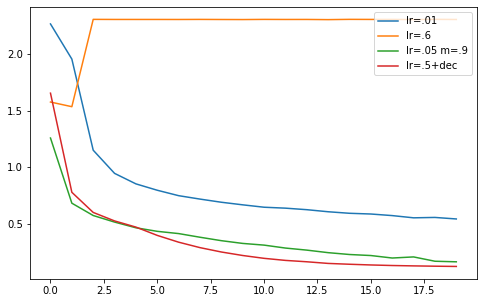

In [14]:
plt.figure(figsize=(8,5))
plt.plot(hist1.history['loss'])
plt.plot(hist2.history['loss'])
plt.plot(hist3.history['loss'])
plt.plot(hist4.history['loss'])
plt.legend(["lr=.01", "lr=.6", "lr=.05 m=.9","lr=.5+dec"], loc="upper right")

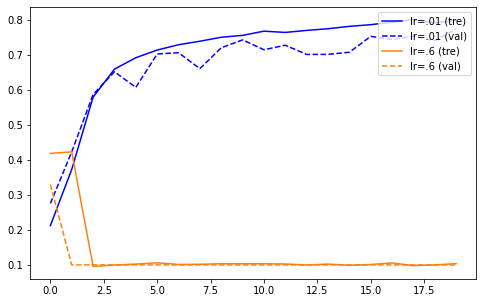

In [15]:
plt.figure(figsize=(8,5))
plt.plot(hist1.history['accuracy'], 'b')
plt.plot(hist1.history['val_accuracy'], 'b--')
plt.plot(hist2.history['accuracy'], color='tab:orange')
plt.plot(hist2.history['val_accuracy'], color='tab:orange', linestyle='--')
plt.legend(["lr=.01 (tre)","lr=.01 (val)","lr=.6 (tre)","lr=.6 (val)"], loc="upper right")

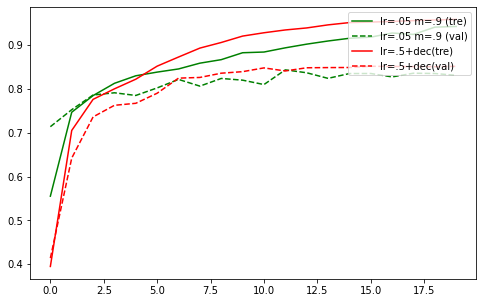

In [16]:
plt.figure(figsize=(8,5))
plt.plot(hist3.history['accuracy'], 'g')
plt.plot(hist3.history['val_accuracy'], 'g--')
plt.plot(hist4.history['accuracy'], 'r')
plt.plot(hist4.history['val_accuracy'], 'r--')
plt.legend(["lr=.05 m=.9 (tre)","lr=.05 m=.9 (val)","lr=.5+dec(tre)","lr=.5+dec(val)"], loc="upper right")